In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import calendar
from sklearn.preprocessing import MinMaxScaler


# Importing Atlantic Hurricane data

### Feature 1. Read TWO data files (JSON,CSV, Excel, etc.).

In [295]:
co2 = pd.read_csv('assets/co2_small.csv')
co2.head()


,Year,CO2 emission (Tons)
0,1950,2.301847e+11
1,1951,2.364093e+11
2,1952,2.427168e+11
3,1953,2.492005e+11
4,1954,2.555678e+11


In [296]:
df = pd.read_csv('assets/atlantic.csv')
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [297]:
df.shape

(49105, 22)

The naming convention was applied to hurricanes starting in 1950. This might indicate better data quality, so we will use hurricane data from 1950 to the most recent year in the dataset

In [298]:
#boolean indexing to df
hurricanes = df[df['Date'] >= 19500000]
hurricanes.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
21879,AL011950,ABLE,19500812,0,,TS,17.1N,55.5W,35,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21880,AL011950,ABLE,19500812,600,,TS,17.7N,56.3W,40,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21881,AL011950,ABLE,19500812,1200,,TS,18.2N,57.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21882,AL011950,ABLE,19500812,1800,,TS,19.0N,58.6W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21883,AL011950,ABLE,19500813,0,,TS,20.0N,60.0W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [299]:
hurricanes.shape

(27226, 22)

Dropping unnecessary columns

In [300]:
hurricanes = hurricanes.drop(columns=['ID', 'Time', 'Event', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'], axis = 1,)

In [301]:
hurricanes.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
21879,ABLE,19500812,TS,17.1N,55.5W,35,-999
21880,ABLE,19500812,TS,17.7N,56.3W,40,-999
21881,ABLE,19500812,TS,18.2N,57.4W,45,-999
21882,ABLE,19500812,TS,19.0N,58.6W,50,-999
21883,ABLE,19500813,TS,20.0N,60.0W,50,-999


In [302]:
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27226 entries, 21879 to 49104
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              27226 non-null  object
 1   Date              27226 non-null  int64 
 2   Status            27226 non-null  object
 3   Latitude          27226 non-null  object
 4   Longitude         27226 non-null  object
 5   Maximum Wind      27226 non-null  int64 
 6   Minimum Pressure  27226 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


Converting to datetime 

In [303]:
hurricanes['Date'] = pd.to_datetime(hurricanes['Date'].astype(str), format = '%Y %m %d')
hurricanes

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
21879,ABLE,1950-08-12,TS,17.1N,55.5W,35,-999
21880,ABLE,1950-08-12,TS,17.7N,56.3W,40,-999
21881,ABLE,1950-08-12,TS,18.2N,57.4W,45,-999
21882,ABLE,1950-08-12,TS,19.0N,58.6W,50,-999
21883,ABLE,1950-08-13,TS,20.0N,60.0W,50,-999
...,...,...,...,...,...,...,...
49100,KATE,2015-11-12,EX,41.3N,50.4W,55,981
49101,KATE,2015-11-12,EX,41.9N,49.9W,55,983
49102,KATE,2015-11-13,EX,41.5N,49.2W,50,985
49103,KATE,2015-11-13,EX,40.8N,47.5W,45,985


Adding seperate year and month columns

In [304]:
hurricanes['Year'] = hurricanes['Date'].map(lambda x: x.year)
hurricanes['Month'] = hurricanes['Date'].map(lambda x: x.month)
hurricanes.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Year,Month
21879,ABLE,1950-08-12,TS,17.1N,55.5W,35,-999,1950,8
21880,ABLE,1950-08-12,TS,17.7N,56.3W,40,-999,1950,8
21881,ABLE,1950-08-12,TS,18.2N,57.4W,45,-999,1950,8
21882,ABLE,1950-08-12,TS,19.0N,58.6W,50,-999,1950,8
21883,ABLE,1950-08-13,TS,20.0N,60.0W,50,-999,1950,8


In [305]:
print(hurricanes['Year'].unique())

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [306]:
print(hurricanes['Month'].unique())

[ 8  9 10 11  1  5 12  2  6  7  4]


According to this dataset, no values for March exist

In [307]:
hurricanes.dtypes

Name                        object
Date                datetime64[ns]
Status                      object
Latitude                    object
Longitude                   object
Maximum Wind                 int64
Minimum Pressure             int64
Year                         int64
Month                        int64
dtype: object

No null values are found but negative values such as -999 for wind represents null. Lets drop these values from the dataset and convert to NaN.

In [308]:
cols_to_check = ['Maximum Wind', 'Minimum Pressure']
negative_mask = (hurricanes[cols_to_check] < 0)
hurricanes[cols_to_check] = hurricanes[cols_to_check].mask(negative_mask, np.nan)


In [309]:
negative_exist = ((hurricanes['Maximum Wind'] < 0) | (hurricanes['Minimum Pressure'] < 0)).any()
print("The number of negative values in the Maximum Wind and Minimum Pressure columns are:", negative_exist.sum())

The number of negative values in the Maximum Wind and Minimum Pressure columns are: 0


Dropping hemisphere tags from coordinates

In [310]:
hurricanes['Latitude'] = hurricanes['Latitude'].str[:-1].astype(float)
hurricanes['Longitude'] = hurricanes['Longitude'].str[:-1].astype(float)

In [311]:
print(hurricanes[['Latitude', 'Longitude']].head())

       Latitude  Longitude
21879      17.1       55.5
21880      17.7       56.3
21881      18.2       57.4
21882      19.0       58.6
21883      20.0       60.0


Grouping storms by Max Wind Speed

In [312]:
max_wind_speeds = hurricanes.loc[hurricanes.groupby('Name')['Maximum Wind'].idxmax(), ['Name', 'Maximum Wind', 'Year', 'Month', 'Latitude', 'Longitude']]
max_wind_speeds


,Name,Maximum Wind,Year,Month,Latitude,Longitude
31610,AMY,60.0,1975,6,35.9,70.5
35322,ANA,60.0,1985,7,44.2,60.3
37712,BOB,100.0,1991,8,36.5,74.5
22074,DOG,125.0,1950,9,24.6,67.7
46971,DON,45.0,2011,7,24.6,91.9
...,...,...,...,...,...,...
28964,FRANCELIA,100.0,1969,9,16.4,86.7
36987,GABRIELLE,125.0,1989,9,19.3,55.7
35158,JOSEPHINE,90.0,1984,10,31.4,71.7
39369,SEBASTIEN,55.0,1995,10,21.5,58.5


In [313]:
max_wind_speeds.to_csv('assets/hurr_wind_speed.csv', index=False)

# Classifying hurricanes by the Saffir-Simpson Hurricane Wind Scale (category 1-5)

In [314]:
max_wind_speeds['category'] = None

for index, row in max_wind_speeds.iterrows():
    wind_speed = row['Maximum Wind']
    if wind_speed >= 74 and wind_speed <= 95:
        max_wind_speeds.at[index, 'category'] = 1
    elif wind_speed >= 96 and wind_speed <= 110:
        max_wind_speeds.at[index, 'category'] = 2
    elif wind_speed >= 111 and wind_speed <= 129:
        max_wind_speeds.at[index, 'category'] = 3
    elif wind_speed >= 130 and wind_speed <= 156:
        max_wind_speeds.at[index, 'category'] = 4
    elif wind_speed >= 157:
        max_wind_speeds.at[index, 'category'] = 5
        

max_wind_speeds.head()

,Name,Maximum Wind,Year,Month,Latitude,Longitude,category
31610,AMY,60.0,1975,6,35.9,70.5,None
35322,ANA,60.0,1985,7,44.2,60.3,None
37712,BOB,100.0,1991,8,36.5,74.5,2
22074,DOG,125.0,1950,9,24.6,67.7,3
46971,DON,45.0,2011,7,24.6,91.9,None


Dropping hurricanes under category 1

In [315]:
max_wind_speeds.dropna(subset=['category'], inplace=True)

In [316]:
max_wind_speeds

,Name,Maximum Wind,Year,Month,Latitude,Longitude,category
37712,BOB,100.0,1991,8,36.5,74.5,2
22074,DOG,125.0,1950,9,24.6,67.7,3
23100,FOX,125.0,1952,10,22.0,80.9,3
22723,HOW,85.0,1951,10,32.8,75.7,1
46234,IDA,90.0,2009,11,23.0,86.5,1
...,...,...,...,...,...,...,...
37786,CLAUDETTE,115.0,1991,9,27.0,61.5,3
48597,CRISTOBAL,75.0,2014,8,37.5,63.6,1
28964,FRANCELIA,100.0,1969,9,16.4,86.7,2
36987,GABRIELLE,125.0,1989,9,19.3,55.7,3


### Feature 3. Visualize your data. Make 3 matplotlib or seaborn visualizations to display your data.

Looking at the distribution of hurricanes by category 

In [317]:
category_counts = max_wind_speeds["category"].value_counts()
fig = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={"x": "Category", "y": "Count"}
)

fig.show()


Interestingly, there are more Category 3 hurricanes than Category 2

Saving max_wind_speeds DF to a new csv

In [318]:
max_wind_speeds.to_csv('assets/hurr_categories.csv', index=False)

In [319]:
max_wind_speeds["category"].unique()

array([2, 3, 1, 4, 5], dtype=object)

Sorting the categories for plotting

In [320]:
category_order = [1, 2, 3, 4, 5]

color_scale = [
    (0, 'blue'),
    (0.25, 'green'),
    (0.5, 'yellow'),
    (0.75, 'orange'),
    (1, 'red')
]

fig = px.scatter(
    max_wind_speeds,
    x="Year",
    y="Maximum Wind",
    color="category",
    color_continuous_scale=color_scale,
    category_orders={"category": category_order}
)

fig.show()

Looking at the distribution of categories by month

In [321]:
category_order = [1, 2, 3, 4, 5]

color_scale = [
    (0, 'blue'),
    (0.25, 'green'),
    (0.5, 'yellow'),
    (0.75, 'orange'),
    (1, 'red')
]

grouped = max_wind_speeds.groupby(["Month", "category"]).size().reset_index(name="count")

month_names = [calendar.month_name[i] for i in range(1, 13)]

fig = px.bar(
    grouped,
    x="Month",
    y="count",
    color="category",
    color_discrete_sequence=color_scale,
    category_orders={"category": category_order},
    barmode="stack"
)

fig.update_layout(
    xaxis=dict(
        ticktext=month_names,
        tickvals=list(range(1, 13))
    ),
    title={
        'text': "Distribution of categories by month",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

We can see how the majority of hurricanes, and specifically higher intensity storms occur between the months of August to October

In [322]:
x = max_wind_speeds['Year']
y = max_wind_speeds['Maximum Wind']

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers'))

fig.update_layout(title='Maximum Wind Speeds for Each Hurricane By Year', xaxis_title='Year', yaxis_title='Maximum Wind Speed (mph)')

fig.show()

# Looking at the distribution of Storms per year

In [323]:
storms_per_year = max_wind_speeds.groupby('Year').size().reset_index(name='Number of storms')
max_wind_speeds_with_count = pd.merge(max_wind_speeds, storms_per_year, on='Year')

max_wind_speeds_with_count.head()

,Name,Maximum Wind,Year,Month,Latitude,Longitude,category,Number of storms
0,BOB,100.0,1991,8,36.5,74.5,2,3
1,GRACE,90.0,1991,10,31.5,61.8,1,3
2,CLAUDETTE,115.0,1991,9,27.0,61.5,3,3
3,DOG,125.0,1950,9,24.6,67.7,3,6
4,JIG,100.0,1950,10,33.0,59.7,2,6


In [324]:
x = storms_per_year['Year']
y = storms_per_year['Number of storms']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y, marker_color='blue'))
fig.update_layout(title='Number of Hurricanes per Year', xaxis_title='Year', yaxis_title='Number of Hurricanes')

fig.show()

Since we are looking at hurricane systems that are above category 1, the bar graph above has missing years because the respective years did produce storms of a miminum intensity for analysis. 

# Merging the datasets 

### Feature 2. Clean your data and perform a pandas merge with your two data sets, then calculate some new values based on the new data set.

In [325]:
co2.columns
max_wind_speeds.columns

Index(['Name', 'Maximum Wind', 'Year', 'Month', 'Latitude', 'Longitude',
       'category'],
      dtype='object')

In [326]:
merged_df = pd.merge(co2, max_wind_speeds, on='Year', how='outer')
merged_df

,Year,CO2 emission (Tons),Name,Maximum Wind,Month,Latitude,Longitude,category
0,1950,2.301847e+11,DOG,125.0,9.0,24.6,67.7,3
1,1950,2.301847e+11,JIG,100.0,10.0,33.0,59.7,2
2,1950,2.301847e+11,ABLE,110.0,8.0,31.7,75.5,2
3,1950,2.301847e+11,ITEM,90.0,10.0,19.4,95.4,1
4,1950,2.301847e+11,KING,115.0,10.0,25.7,80.2,3
...,...,...,...,...,...,...,...,...
207,2014,1.447122e+12,ARTHUR,85.0,7.0,34.0,77.3,1
208,2014,1.447122e+12,GONZALO,125.0,10.0,25.6,68.7,3
209,2014,1.447122e+12,CRISTOBAL,75.0,8.0,37.5,63.6,1
210,2015,1.479602e+12,DANNY,110.0,8.0,13.8,47.8,2


Normalizing CO2 and Maximum Wind values

In [327]:
cols_to_normalize = ['CO2 emission (Tons)', 'Maximum Wind']
scaler = MinMaxScaler()
merged_df[cols_to_normalize] = scaler.fit_transform(merged_df[cols_to_normalize])
merged_df[['CO2 emission (Tons)', 'Maximum Wind']]


,CO2 emission (Tons),Maximum Wind
0,0.000000,0.555556
1,0.000000,0.277778
2,0.000000,0.388889
3,0.000000,0.166667
4,0.000000,0.444444
...,...,...
207,0.974003,0.111111
208,0.974003,0.555556
209,0.974003,0.000000
210,1.000000,0.388889


Plotting the normalized values 

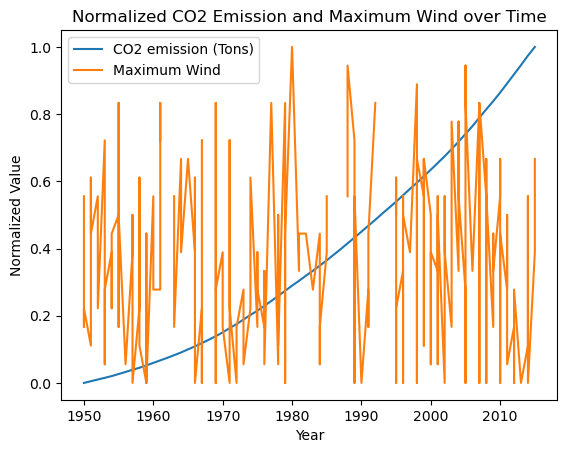

In [328]:
fig, ax = plt.subplots()
ax.plot(merged_df['Year'], merged_df['CO2 emission (Tons)'], label='CO2 emission (Tons)')
ax.plot(merged_df['Year'], merged_df['Maximum Wind'], label='Maximum Wind')
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized CO2 Emission and Maximum Wind over Time')
ax.legend()

plt.show()

Normalizing the values for CO2 and Wind Speed doesn't seem to show a correlation. Because the values for CO2 are consistently rising while the max wind values fluctuate quite a bit between 0 and 1.

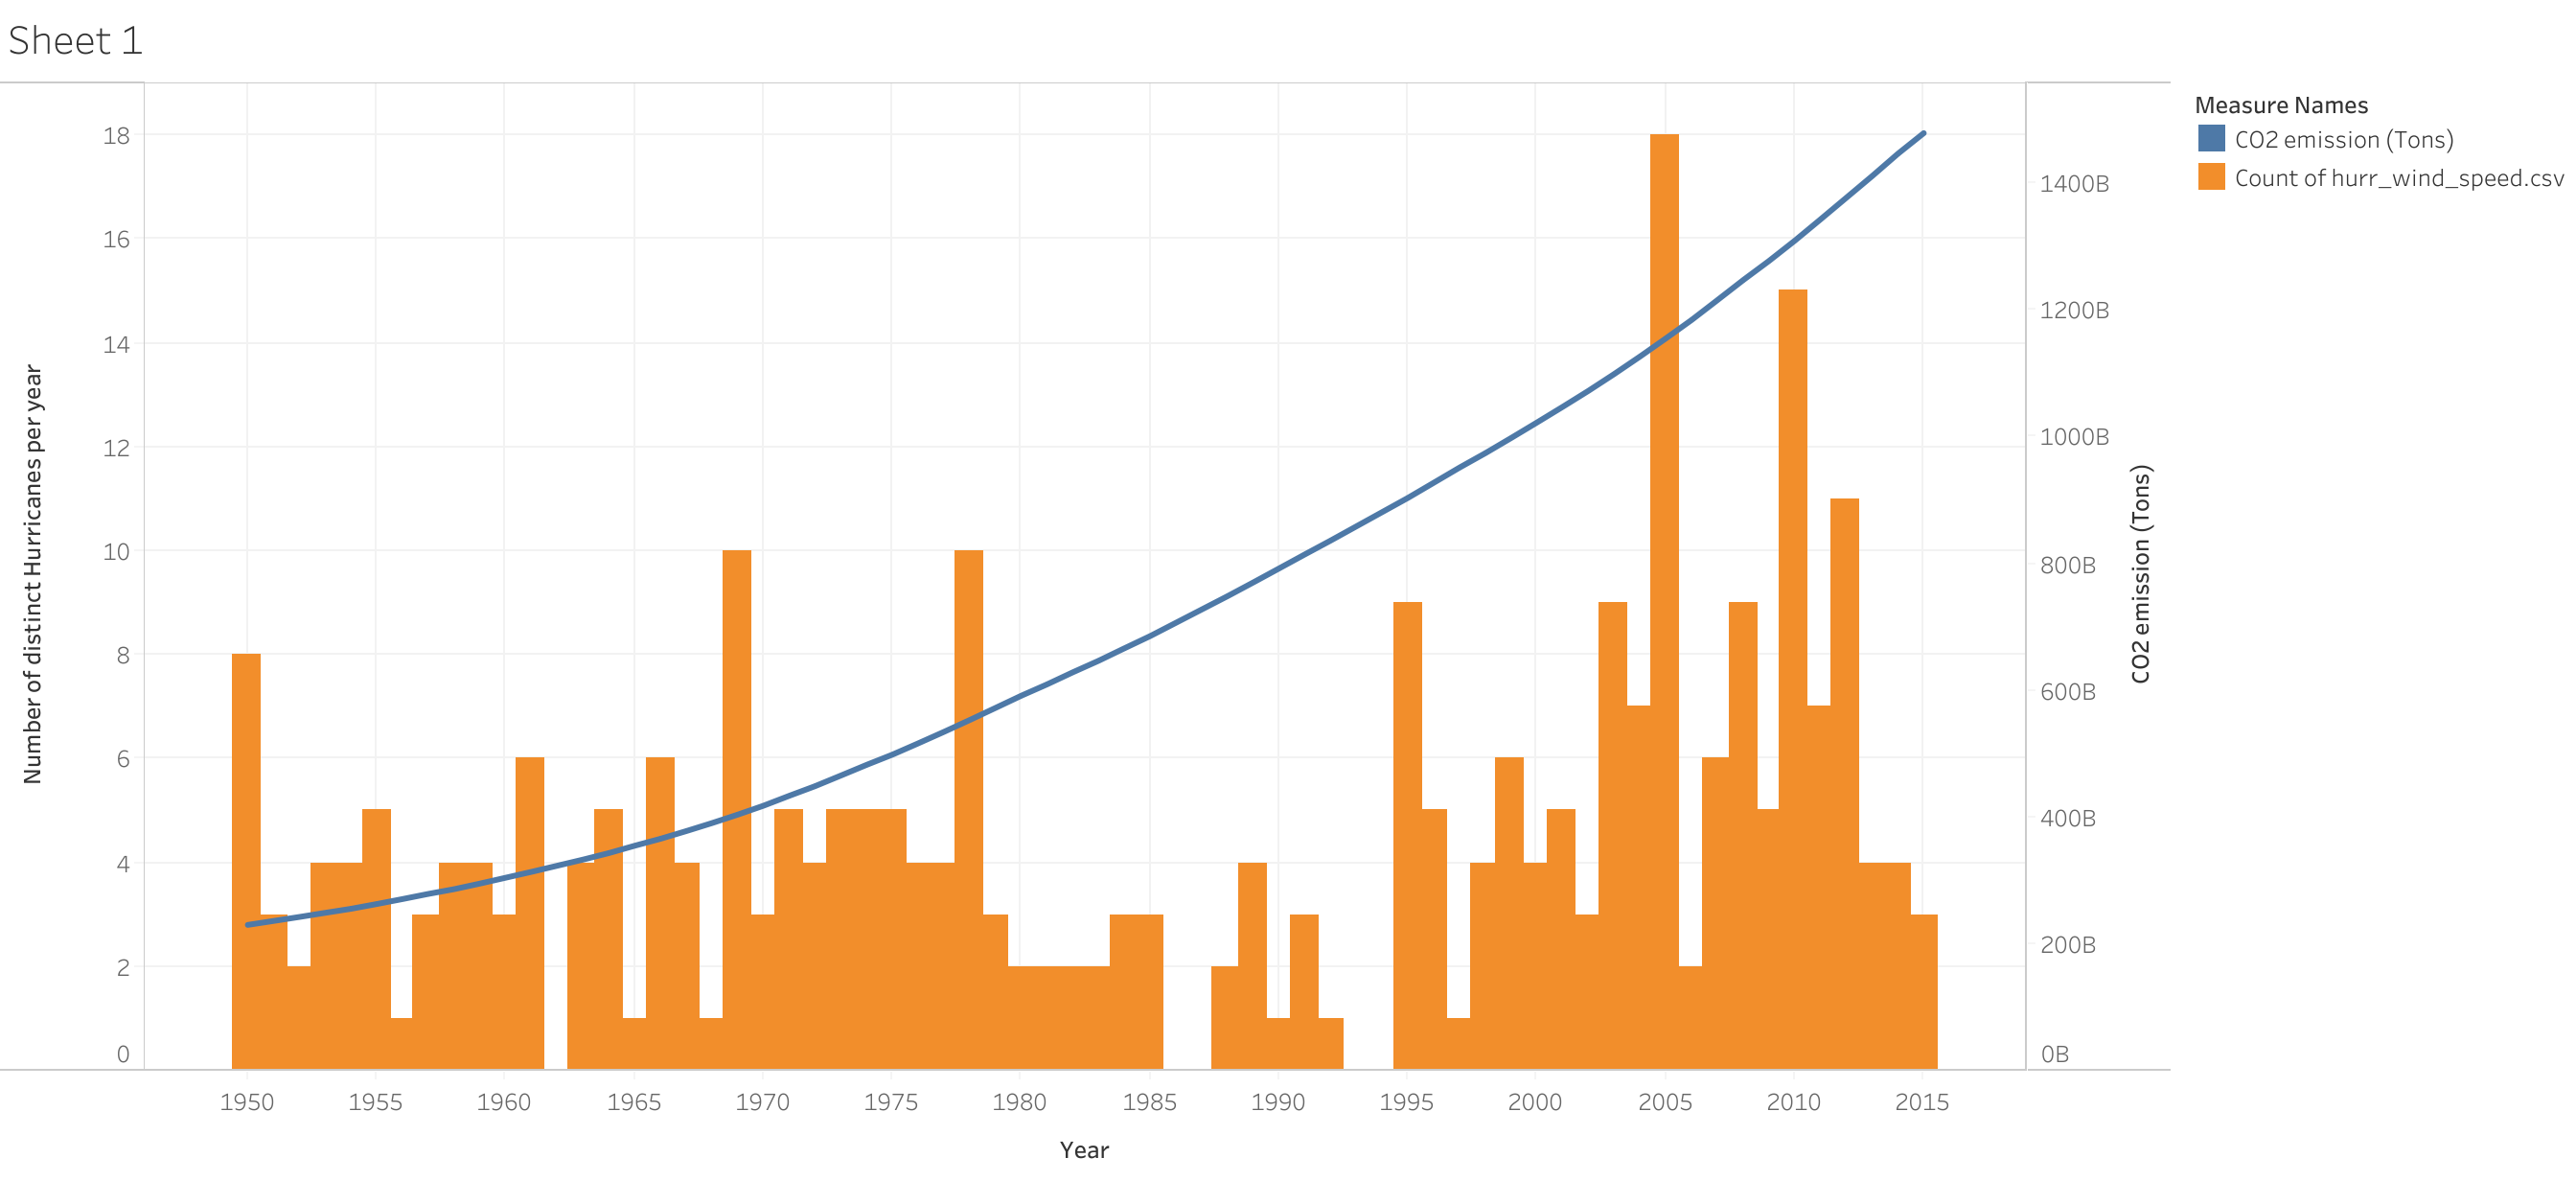

In [329]:
from IPython.display import Image
Image(filename='Sheet 1.png')

### Feature 5. Interpretation of your data.

The graph shows two sets of data: the first is the concentration of carbon dioxide (CO2) in the atmosphere over time, and the second is the number of hurricanes per year over the same time period. The graph indicates that the concentration of CO2 in the atmosphere has been steadily increasing over time, which is represented by the upward trend in the blue line.

The graph also shows the number of hurricanes per year, which is represented by the bars. The distribution of the number of hurricanes appears to be increasing overall, as the bars get taller over time. However, the distribution is not smooth and the bars do not follow the same pattern as the CO2 data. The gaps in years for number of hurricanes is a result of omitting storms less than category 1, since the purpose of this notebook is to identify trends of intense hurricanes. So these years with no data in the graph represent years without significant storms in the Atlantic.

The graph highlights that in recent years, from 1995 to 2015, there appears to be an increase in the number of powerful hurricane systems, which may be correlated to the rising concentration of CO2 levels. This can be seen in the taller bars during this time period, indicating an increase in the number of strong hurricanes.

Overall, the graph suggests that the concentration of CO2 in the atmosphere is steadily increasing, and that there may be a correlation between this increase and the number of powerful hurricane systems in recent years. However, it is important to note that the distribution of the number of hurricanes is not a direct reflection of CO2 concentrations, and other factors such as weather patterns and ocean currents may also play a role in the frequency and intensity of hurricanes.

### Feature 4. Best Practices. Utilize a virtual environment and include instructions in your README on how the user should set one up

See readme for instructions on how to setup and run a virtual environment 